In [1]:
%matplotlib inline
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../'); sys.path.insert(0, '../samples')
sys.path.insert(0, './')

from mvpose.topdown.bb import BoundBoxExtractor

bb = BoundBoxExtractor()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/home/tanke/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
from mvpose.data import umpm
from os.path import join
import numpy as np

root = join(Settings['data_root'], 'pak')
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']
tmp = Settings['tmp']

FRAME = 1430
#FRAME = 0

X, Y, Calib = umpm.get(root, 'p2_free_1', user, pwd)
Imgs = [X[0][FRAME], X[1][FRAME], X[2][FRAME], X[3][FRAME]]

boxes = bb.extract_bbs(Imgs)

UMPM


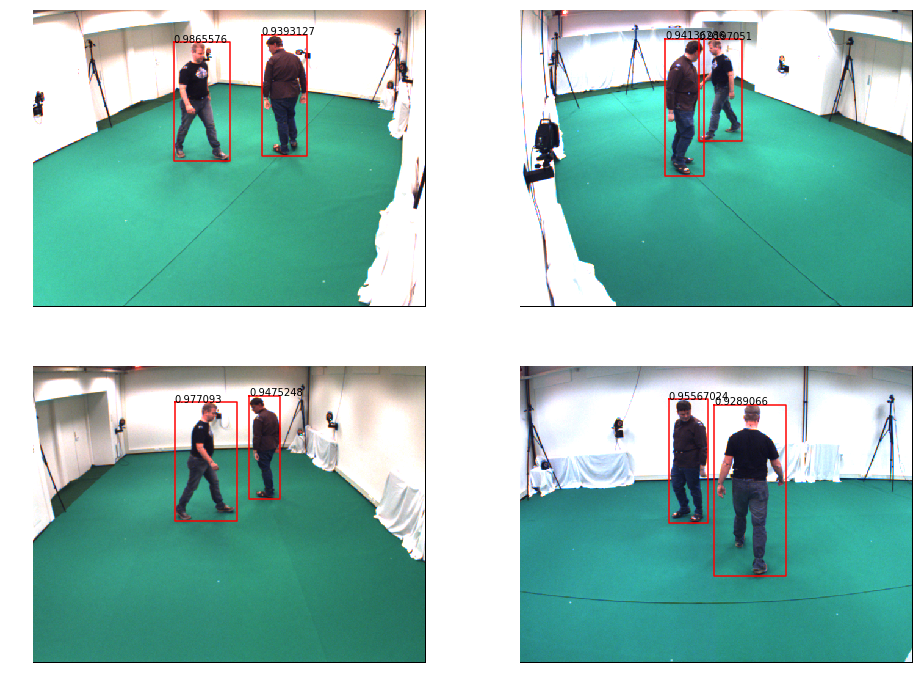

In [3]:
fig = plt.figure(figsize=(16,12))

for cid, (im_boxes, im) in enumerate(zip(boxes, Imgs)):
    ax = fig.add_subplot(2,2,1+cid)
    ax.axis('off')
    h,w,_ = im.shape
    ax.imshow(im)
    
    for x1, y1, x2, y2, score in im_boxes:
        ax.plot([x1, x1, x2, x2, x1], 
                [y1, y2, y2, y1, y1], color='red')
        ax.text(x1, y1, str(score))
    
plt.show()